<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [8]:
import seaborn as sns
import pandas as pd

Load the dataset into a dataframe.


In [9]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Pннннlot the distribution curve for the column `ConvertedComp`.


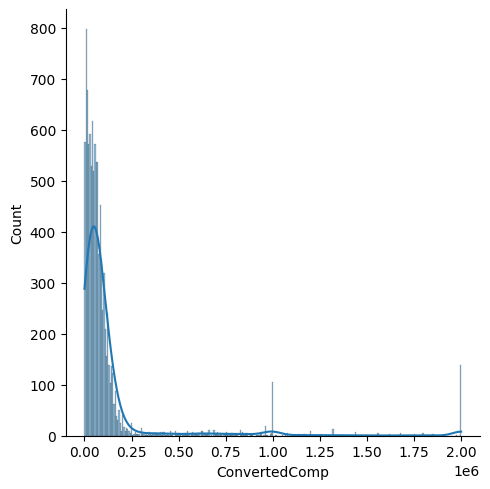

In [10]:
sns.displot(df, x='ConvertedComp', kde=True)

Plot the histogram for the column `ConvertedComp`.


In [11]:
# your code goes here
import matplotlib.pyplot as plt

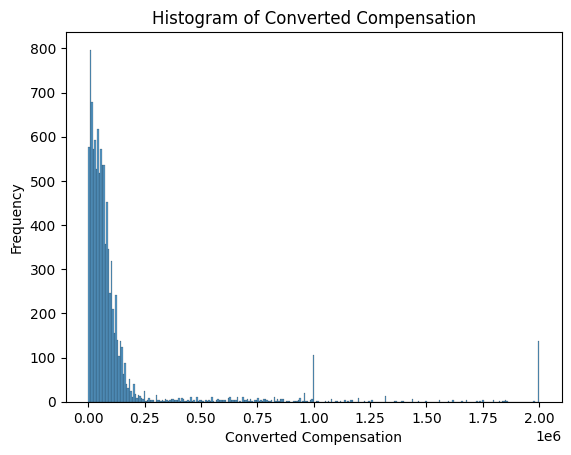

In [13]:
sns.histplot(df['ConvertedComp'], kde=False)  # 'kde=False' removes the kernel density estimation line
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
median = df['ConvertedComp'].median()
print("Median of ConvertedComp column:", median)

Median of ConvertedComp column: 57745.0


How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
only_man_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders identifying only as 'Man':", only_man_count)

Number of responders identifying only as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
median_woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp of responders identifying only as 'Woman':", median_woman_comp)


Median ConvertedComp of responders identifying only as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
five_num_summary = df['Age'].describe(percentiles=[.25, .5, .75])
print(five_num_summary[['min', '25%', '50%', '75%', 'max']])

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


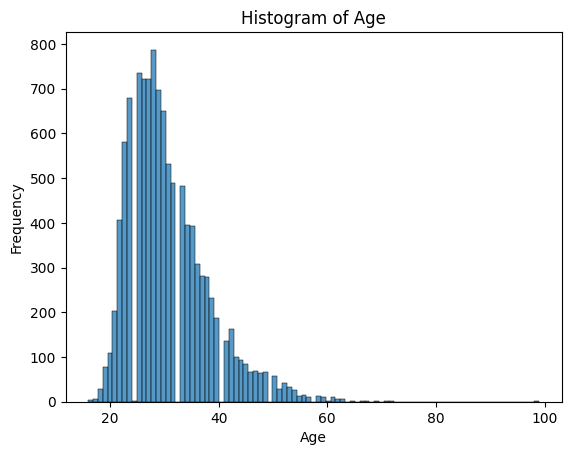

In [18]:
# your code goes here
sns.histplot(data=df, x='Age', kde=False)  # 'kde=False' removes the kernel density estimation line
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


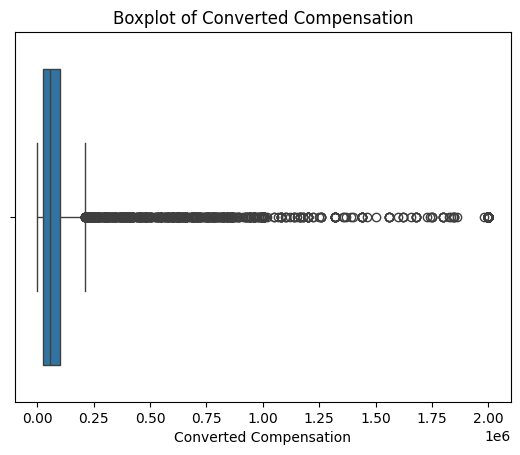

In [19]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])
plt.title('Boxplot of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1
print("Interquartile Range for ConvertedComp:", IQR)

Interquartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [21]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for ConvertedComp:", lower_bound)
print("Upper Bound for ConvertedComp:", upper_bound)

Lower Bound for ConvertedComp: -82830.0
Upper Bound for ConvertedComp: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
outliers_count = outliers.shape[0]

print("Number of outliers in ConvertedComp:", outliers_count)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
# your code goes here
numerical_cols = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Select the correlation values for Age column
age_corr = corr_matrix['Age']

# Print the correlation values for Age column
print(age_corr)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
